<a href="https://colab.research.google.com/github/divyakanojia/machinelearning/blob/main/Data_Cleaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves cleaning and transforming raw data into a format that can be effectively and efficiently utilized for analysis or used to train machine learning models. The goal of data preprocessing is to enhance the quality of the data, making it more suitable for the specific tasks at hand.**



# **1. Handling Missing Values:**
Missing values can occur in datasets due to various reasons such as data collection errors, equipment malfunctions, or simply because certain information was not collected. Dealing with missing values is crucial to avoid biased or inaccurate results.

Example:
Consider a dataset with information about customers, including their ages:

In [ ]:
import pandas as pd

# Creating a sample dataset with missing values
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'mukta'],
        'Age': [25, None, 30, 35, None, 25],
        'Income': [50000, 60000, 75000, None, 80000, None]}

df = pd.DataFrame(data)


In [ ]:
df

,Name,Age,Income
0,Alice,25.0,50000.0
1,Bob,NaN,60000.0
2,Charlie,30.0,75000.0
3,David,35.0,NaN
4,Eva,NaN,80000.0
5,mukta,25.0,NaN


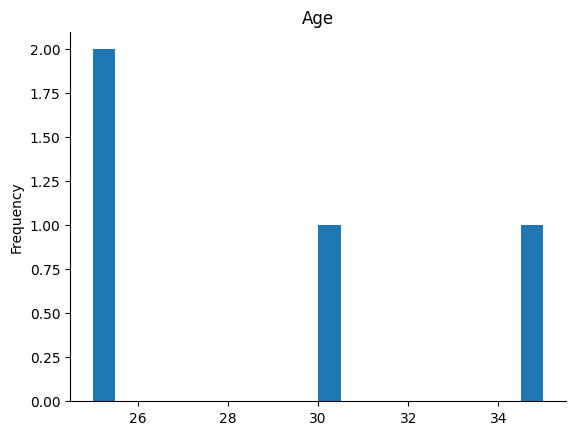

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Handling Missing Values:
Removing Rows: If the number of missing values is small, you might choose to remove rows with missing values.

In [ ]:
df_cleaned = df.dropna()


In [ ]:
df_cleaned

,Name,Age,Income
0,Alice,25.0,50000.0
2,Charlie,30.0,75000.0


**Imputation:** Fill in missing values with the mean, median, or mode of the respective column.


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Income'].fillna(df['Income'].mean(), inplace=True)


In [ ]:
df

,Name,Age,Income
0,Alice,25.0,50000.0
1,Bob,27.5,60000.0
2,Charlie,30.0,75000.0
3,David,35.0,66250.0
4,Eva,27.5,80000.0
5,mukta,25.0,66250.0


**2. Handling Outliers:**
Outliers are data points that significantly differ from the rest of the dataset. Outliers can skew statistical analysis and machine learning models, leading to inaccurate results.

Example:
Consider a dataset with a variable representing the salary of employees:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a sample dataset with outliers
data = {'Employee_ID': [1, 2, 3, 4, 5, 6, 7],
        'Salary': [50000, 52000, 55000, 60000, 75000, 80000, 150000]}

df = pd.DataFrame(data)


In [ ]:
df

,Employee_ID,Salary
0,1,50000
1,2,52000
2,3,55000
3,4,60000
4,5,75000
5,6,80000
6,7,100000


Handling Outliers:
Visualization: Plot a box plot or a histogram to identify outliers.

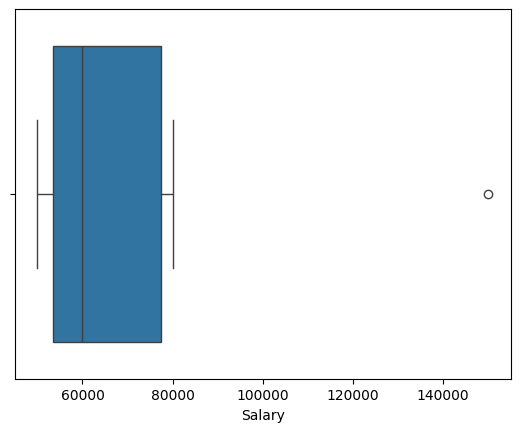

In [ ]:
sns.boxplot(x='Salary', data=df)
plt.show()


Trimming or Capping: Remove or cap extreme values based on a certain threshold.


In [ ]:
threshold = 100000
df['Salary'] = df['Salary'].apply(lambda x: threshold if x > threshold else x)


In [ ]:
df

,Employee_ID,Salary
0,1,50000
1,2,52000
2,3,55000
3,4,60000
4,5,75000
5,6,80000
6,7,100000


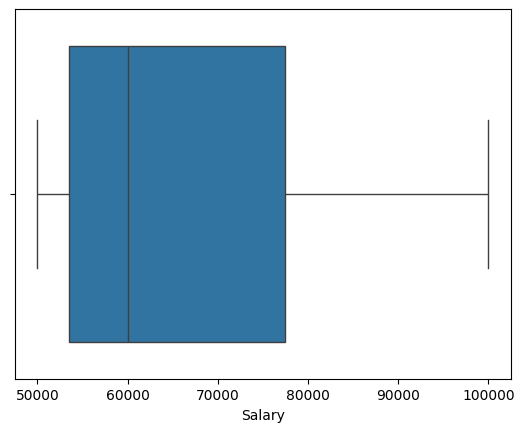

In [ ]:
sns.boxplot(x='Salary', data=df)
plt.show()


**3. Handling Inconsistent Data:**
Inconsistent data can include typos, spelling variations, or conflicting information. Resolving these inconsistencies ensures the reliability of the dataset.

Example:
Consider a dataset with a column representing gender:

In [ ]:
# Creating a sample dataset with inconsistent gender data
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
        'Gender': ['Female', 'Male', 'F', 'Male', 'Female']}

df = pd.DataFrame(data)
df

,Name,Gender
0,Alice,Female
1,Bob,Male
2,Charlie,F
3,David,Male
4,Eva,Female


**Standardization:** Standardize categorical values to a consistent format.

In [ ]:
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})
df

,Name,Gender
0,Alice,Female
1,Bob,Male
2,Charlie,Female
3,David,Male
4,Eva,Female


**Correction:** Manually correct inconsistent values based on domain knowledge.

In [ ]:
df.at[2, 'Gender'] = 'Female'
df

,Name,Gender
0,Alice,Female
1,Bob,Male
2,Charlie,Female
3,David,Male
4,Eva,Female


# **Data cleaning is an essential step in ensuring the accuracy and reliability of the dataset. The specific methods used depend on the nature of the data and the requirements of the analysis or modeling task. Regular exploration and understanding of the dataset are crucial for effective data cleaning.**

Data scaling, normalization, and transformation are techniques used in data preprocessing to prepare data for analysis or machine learning algorithms. Each technique serves a specific purpose in handling different types of data and improving the performance of models. Let's explore each of these techniques in detail along with examples.

### 1. Data Scaling:

Data scaling involves transforming the numerical values of different features to a specific range. This is particularly important when the features have different units or scales, as it can impact the performance of certain machine learning algorithms that rely on distances between data points.

**Example:**
Consider a dataset with two features - "Age" (ranging from 0 to 100) and "Income" (ranging from 20,000 to 100,000). The scale difference between these features can affect algorithms like k-nearest neighbors or support vector machines. Scaling can be applied to bring both features to a similar scale, for instance, between 0 and 1.


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sample dataset
data = {'Age': [25, 50, 75, 30, 60],
        'Income': [50000, 75000, 100000, 25000, 60000]}

df = pd.DataFrame(data)

# Using MinMaxScaler to scale features between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

print(scaled_data)

[[0.         0.33333333]
 [0.5        0.66666667]
 [1.         1.        ]
 [0.1        0.        ]
 [0.7        0.46666667]]


In [ ]:
df

,Name,Age,Income
0,Alice,25.0,50000.0
1,Bob,27.5,60000.0
2,Charlie,30.0,75000.0
3,David,35.0,66250.0
4,Eva,27.5,80000.0
5,mukta,25.0,66250.0



### 2. Data Normalization:

Normalization is a specific type of scaling that transforms the data to have a mean of 0 and a standard deviation of 1. This is useful when the features have different ranges and the algorithm is sensitive to the scale of the data.

**Example:**
Consider a dataset with features like "Height" (ranging from 150 to 200 cm) and "Weight" (ranging from 50 to 100 kg). Normalization can be applied to standardize these features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sample dataset
data = {'Height': [160, 170, 180, 150, 190],
        'Weight': [70, 80, 90, 60, 100]}

df1 = pd.DataFrame(data)

# Using StandardScaler to normalize features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df1)

print(normalized_data)


[[-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [-1.41421356 -1.41421356]
 [ 1.41421356  1.41421356]]


In [ ]:
df1

,Height,Weight
0,160,70
1,170,80
2,180,90
3,150,60
4,190,100



### 3. Data Transformation:

Data transformation involves modifying the original data to make it more suitable for a particular analysis or algorithm. It can include operations like taking logarithms, square roots, or other mathematical functions to stabilize variance or make the data more linear.

**Example:**
Consider a dataset with a feature "Sales" that has a skewed distribution. Applying a log transformation can help in making the distribution more symmetrical.


In [ ]:
import numpy as np

# Sample dataset
data = {'Sales': [100, 150, 200, 50, 250, 3000]}

df = pd.DataFrame(data)

# Using log transformation
df['Log_Sales'] = np.log1p(df['Sales'])

df


,Sales,Log_Sales
0,100,4.615121
1,150,5.017280
2,200,5.303305
3,50,3.931826
4,250,5.525453
5,3000,8.006701


In this example, `np.log1p` is used to apply the natural logarithm to the "Sales" feature. Adding 1 to the data before taking the logarithm helps handle cases where the data contains zero values.


### Summary:

- **Data Scaling:** Adjusting the range of numerical features.
- **Data Normalization:** Transforming data to have a mean of 0 and a standard deviation of 1.
- **Data Transformation:** Modifying data using mathematical functions to improve its characteristics.

Choosing the appropriate technique depends on the characteristics of your data and the requirements of the machine learning algorithm you plan to use. It's often a good practice to experiment with different techniques and observe their impact on model performance.